This notebook demonstrates an example for exploring the dataset in the Jupyter Notebook. This is often *mandatory* before we start making the dashboard using Dash. 

Not familiar with data importing, manipulation, cleaning, or exploration in Python? 

Please take our course **Python for Data Analysis: step-by-step with projects**:
https://www.udemy.com/course/python-for-data-analysis-step-by-step/?referralCode=C8B8B507FB1197183455. You'll become proficient and confident with analyzing data in Python with its practical content.


# import two libraries:
- pandas: for loading and manipulating datasets.
- plotly.express: for generating data visualizations.

In [1]:
import pandas as pd
import plotly.express as px

# load the dataset with the `read_csv` function and take a look at its `info` summary

In [2]:
df = pd.read_csv('avocado.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  object 
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


# Suppose we want to present the average prices of different types of avocados for various geographies across time?
i.e., we want to focus on presenting the information of the columns `date`, `average_price`, `type`, and `geography`

# What are the different `type` and `geography` of avocados?

Let’s look at the categories using the `value_counts` method with `dropna = False`. This will show us the unique categories for these variables.

In [3]:
print(df['type'].value_counts(dropna=False))
print(df['geography'].value_counts(dropna=False))

conventional    15012
organic         15009
Name: type, dtype: int64
Albany                  556
Sacramento              556
Northeast               556
Northern New England    556
Orlando                 556
Philadelphia            556
Phoenix/Tucson          556
Pittsburgh              556
Plains                  556
Portland                556
Raleigh/Greensboro      556
Richmond/Norfolk        556
Roanoke                 556
San Diego               556
Atlanta                 556
San Francisco           556
Seattle                 556
South Carolina          556
South Central           556
Southeast               556
Spokane                 556
St. Louis               556
Syracuse                556
Tampa                   556
Total U.S.              556
West                    556
New York                556
New Orleans/Mobile      556
Nashville               556
Midsouth                556
Baltimore/Washington    556
Boise                   556
Boston                  556
Buffalo

There are two categories of `type`, and many different categories for `geography`. 

Since there are only two avocados types, we can plot their `average_price` time series on the same line chart.

Let’s try to plot such a figure when `geography` is ‘Los Angeles’.

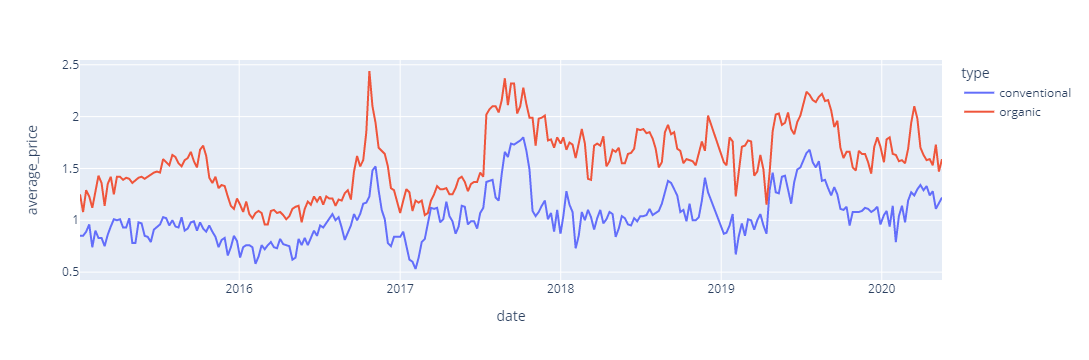

In [4]:
msk = df['geography'] == 'Los Angeles'
px.line(df[msk], x='date', y='average_price', color='type')

This is a nice chart, but it’s only for one geography of ‘Los Angeles’.

How can we make it easy for users to explore this information from different `geography`?

If we have a dropdown with `geography` options, the users would be able to choose among them. Then according to the `geography` selected by the users, we can display the above line plot to them for that specific `geography`.

This is something we can do easily with Dash!

It’s time to use Dash.